<a href="https://colab.research.google.com/github/gmihaila/machine_learning_toolbox/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Universal Autoencoder

Materials: 

https://blog.keras.io/building-autoencoders-in-keras.html

https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/

https://www.datacamp.com/community/tutorials/autoencoder-keras-tutorial

![alt text](https://blog.keras.io/img/ae/autoencoder_schema.jpg)


In [1]:
from IPython.display import clear_output

print("Install pydot")
!apt-get -qq install -y graphviz && pip install -q pydot
clear_output()

print("Downloading data...")

clear_output()

!ls

sample_data


In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Softmax
from keras import optimizers
from keras.utils.vis_utils import plot_model
from IPython.display import Image




encoding_dim = 300

# input
model_input = Input(shape=(2,), name='INPUT')
# encoder layer
encod = Dense(units=encoding_dim, activation='relu', name='ENCODER', use_bias=True, )(model_input)
# decoder layer
decode = Dense(units=2, activation='sigmoid', name='DECODER', use_bias=True, )(encod)

# assemble model
autoencoder = Model(model_input, decode)

# Encoder model
encoder = Model(model_input, encod)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# compile model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



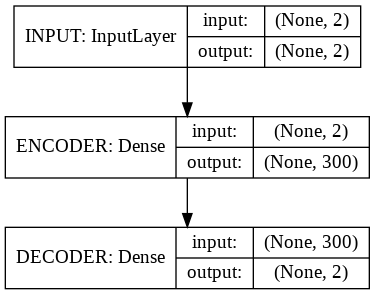

In [6]:
# image model
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png')

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)